Target:
* Set up the code structure
* Build data loader
* set up basic train, and test loop
* set up optimizer

Result:
* Model is up and running
* Preliminary model has ~ 9200 parameters
* Initial run gave a training accuracy of 88% and similar test accuracy

Analysis:
*  Training accuracy has platueaed at around 87 by 4th epoch and has not increased
* I need to improve the update the model skeleton to get better results before tuning the model for performance

In [1]:
!git clone "https://github.com/jyanivaddi/ERA_V1.git"
!git pull

Cloning into 'ERA_V1'...
remote: Enumerating objects: 160, done.
remote: Counting objects: 100% (160/160), done.
remote: Compressing objects: 100% (129/129), done.
remote: Total 160 (delta 66), reused 100 (delta 26), pack-reused 0
Receiving objects: 100% (160/160), 3.25 MiB | 25.61 MiB/s, done.
Resolving deltas: 100% (66/66), done.
fatal: not a git repository (or any of the parent directories): .git


Add all the imports

In [1]:
from __future__ import print_function
import sys
sys.path.append("ERA_V1/session_7")
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms
from s7_utils import load_mnist_data, preview_batch_images, plot_statistics
from s7_model import Model_2_Net, model_summary, model_train, model_test

Allocate GPU

In [2]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
mnist_model = Model_2_Net().to(device)
model_summary(mnist_model, input_size=(1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              72
              ReLU-2            [-1, 8, 26, 26]               0
            Conv2d-3           [-1, 16, 24, 24]           1,152
              ReLU-4           [-1, 16, 24, 24]               0
            Conv2d-5           [-1, 32, 22, 22]           4,608
              ReLU-6           [-1, 32, 22, 22]               0
         MaxPool2d-7           [-1, 32, 11, 11]               0
            Conv2d-8            [-1, 8, 11, 11]             256
              ReLU-9            [-1, 8, 11, 11]               0
           Conv2d-10             [-1, 16, 9, 9]           1,152
             ReLU-11             [-1, 16, 9, 9]               0
           Conv2d-12             [-1, 32, 7, 7]           4,608
             ReLU-13             [-1, 32, 7, 7]               0
           Conv2d-14             [-1, 1

Define Transforms

In [3]:
train_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,),(0.3081,))
])
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,),(0.3081,))
])

Download Data

In [4]:
train_data, test_data = load_mnist_data(train_transforms, test_transforms)

Define train and test loaders

In [5]:
torch.manual_seed(1)
batch_size = 128
kwargs = {'num_workers': 2, 'pin_memory': True} if use_cuda else {}
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle = True, **kwargs)
test_loader = torch.utils.data.DataLoader(test_data, batch_size = batch_size, shuffle = True, **kwargs)

Preview data

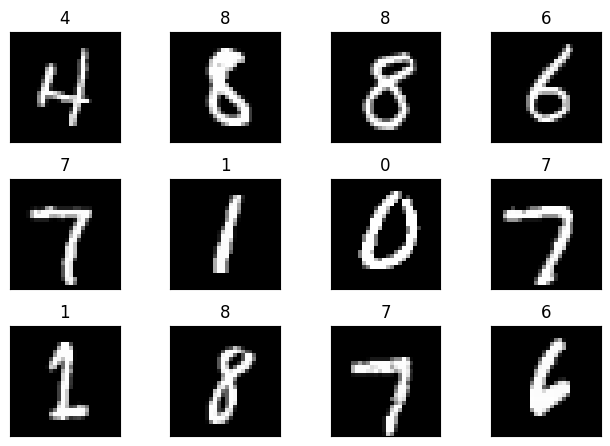

In [6]:
preview_batch_images(train_loader)

In [8]:
model = Model_2_Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
train_losses = []
test_losses = []
train_acc = []
test_acc = []
for epoch in range(1,20):
    print(f"epoch: {epoch}")
    model_train(model, device, train_loader, optimizer, train_acc, train_losses)
    model_test(model, device, test_loader, test_acc, test_losses)


epoch: 1


  0%|          | 0/469 [00:00<?, ?it/s]


KeyboardInterrupt: 

Plot Statistics

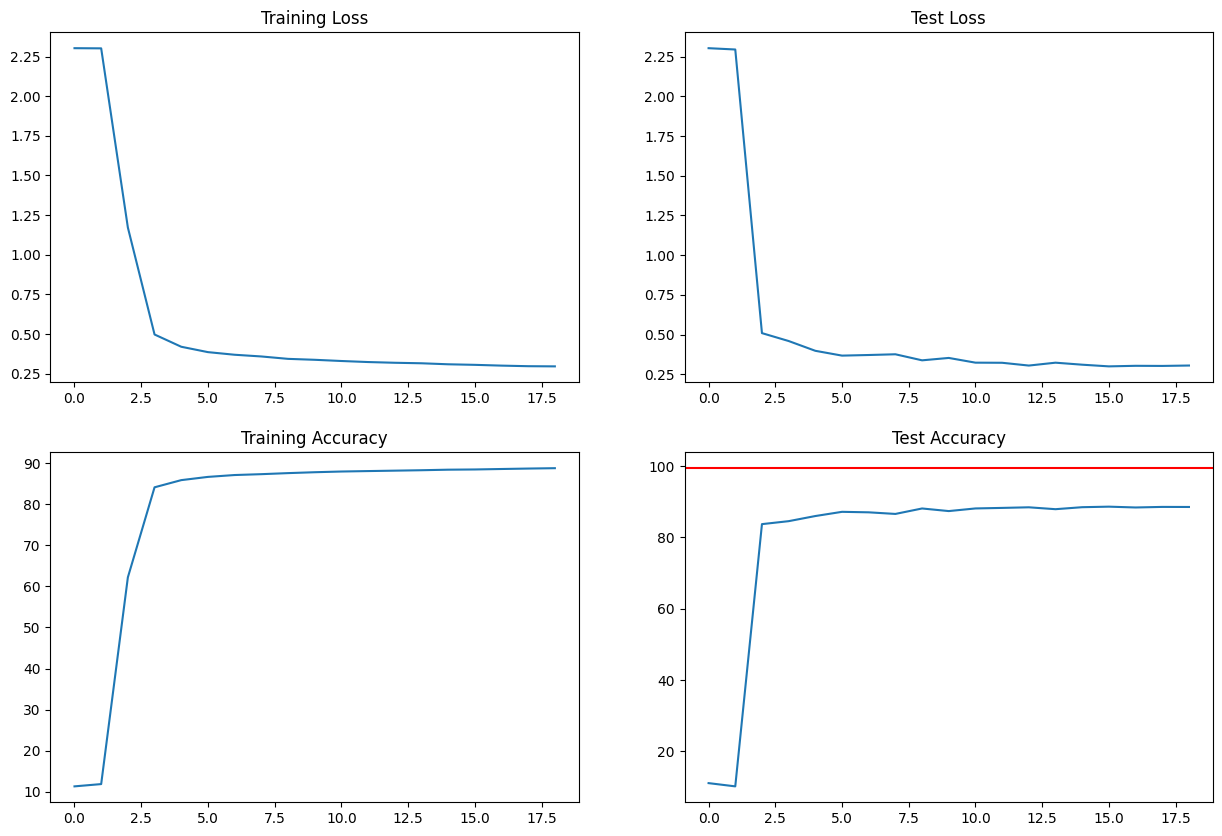

In [10]:
plot_statistics(train_losses, train_acc, test_losses, test_acc)